In [1]:
import requests

In [2]:
url='https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=RELIANCE.BSE&apikey=P7FKY6XD1T2N0TBD'
r = requests.get(url)
data = r.json()
print(r.status_code)
print(r.text)

200
{
    "Meta Data": {
        "1. Information": "Daily Prices (open, high, low, close) and Volumes",
        "2. Symbol": "RELIANCE.BSE",
        "3. Last Refreshed": "2026-02-20",
        "4. Output Size": "Compact",
        "5. Time Zone": "US/Eastern"
    },
    "Time Series (Daily)": {
        "2026-02-20": {
            "1. open": "1410.0000",
            "2. high": "1427.7500",
            "3. low": "1406.8500",
            "4. close": "1420.0500",
            "5. volume": "357252"
        },
        "2026-02-19": {
            "1. open": "1441.5500",
            "2. high": "1444.0500",
            "3. low": "1401.0000",
            "4. close": "1410.8000",
            "5. volume": "1156640"
        },
        "2026-02-18": {
            "1. open": "1425.4000",
            "2. high": "1442.3500",
            "3. low": "1419.0000",
            "4. close": "1441.2500",
            "5. volume": "368386"
        },
        "2026-02-17": {
            "1. open": "1432.4000",
      

In [4]:
if "Time Series (Daily)" not in data:
    print(data)
    exit()

In [5]:
time_series = data["Time Series (Daily)"]

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame.from_dict(time_series, orient="index")
df.columns = ["open", "high", "low", "close", "volume"]
df=df.astype(float)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df.head()

,open,high,low,close,volume
2025-09-26,1372.40,1382.40,1365.55,1377.75,792106.0
2025-09-29,1380.10,1388.40,1368.25,1374.00,477774.0
2025-09-30,1374.65,1376.05,1362.90,1363.80,1226892.0
2025-10-01,1364.25,1378.20,1363.05,1368.80,1254860.0
2025-10-03,1363.00,1371.00,1357.20,1363.45,869282.0


In [17]:
df.to_csv("reliance_daily.csv")

In [8]:
print(df.isnull().sum())

open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [9]:
df["MA_20"] = df["close"].rolling(window=20).mean()
df.tail()

,open,high,low,close,volume,MA_20
2026-02-16,1418.25,1439.00,1409.20,1436.40,477800.0,1421.8850
2026-02-17,1432.40,1432.40,1418.80,1422.80,180120.0,1422.3625
2026-02-18,1425.40,1442.35,1419.00,1441.25,368386.0,1424.7550
2026-02-19,1441.55,1444.05,1401.00,1410.80,1156640.0,1425.1000
2026-02-20,1410.00,1427.75,1406.85,1420.05,357252.0,1426.0125


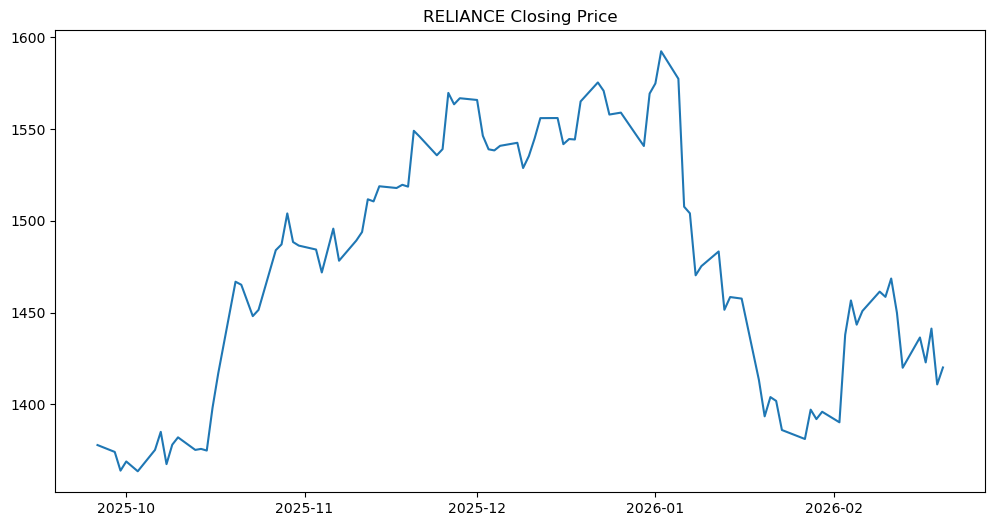

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df["close"])
plt.title("RELIANCE Closing Price")
plt.show()

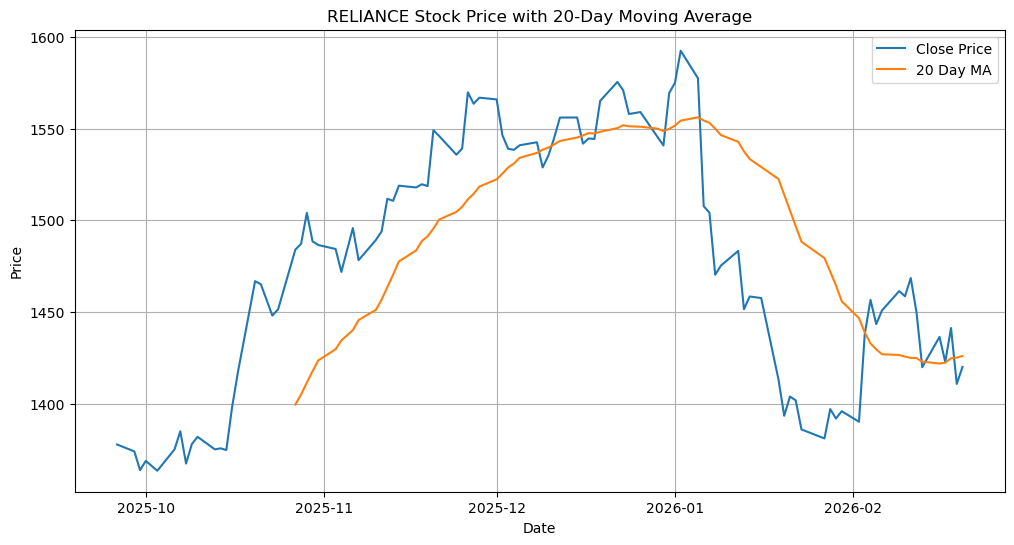

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df["close"], label="Close Price")
plt.plot(df["MA_20"], label="20 Day MA")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("RELIANCE Stock Price with 20-Day Moving Average")
plt.legend()
plt.grid(True)

plt.show()